# avocado sales  analysis

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
import seaborn as sns
import numpy as np

In [164]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\avocado.csv",index_col=0)

In [194]:
df

,date,averageprice,totalvolume,4046,4225,4770,totalbags,smallbags,largebags,xlargebags,type,year,region,monthnum,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,Dec
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,Dec
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,Dec
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,Dec
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.32,7363.56,89.59,440.31,0.00,6833.66,6827.78,5.88,0.0,organic,2018,Tampa,2,Feb
8,2018-01-28,1.61,7695.89,156.01,859.20,0.00,6680.68,5567.39,1113.29,0.0,organic,2018,Tampa,1,Jan
9,2018-01-21,1.52,6871.05,76.66,407.09,0.00,6387.30,6375.55,11.75,0.0,organic,2018,Tampa,1,Jan
10,2018-01-14,1.53,7238.04,106.98,496.61,0.00,6634.45,6634.45,0.00,0.0,organic,2018,Tampa,1,Jan


In [165]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","")
df=df.loc[:,df.columns.isin(["unnamed:0"])==False]
df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].dt.year
df["monthnum"]=df["date"].dt.month
df["month"]=df["date"].dt.month_name().str[:3]

df=df[df.region.str.contains("total|west|east|south|north",regex=True,case=False)==False]


# how average price and volume differ over time 

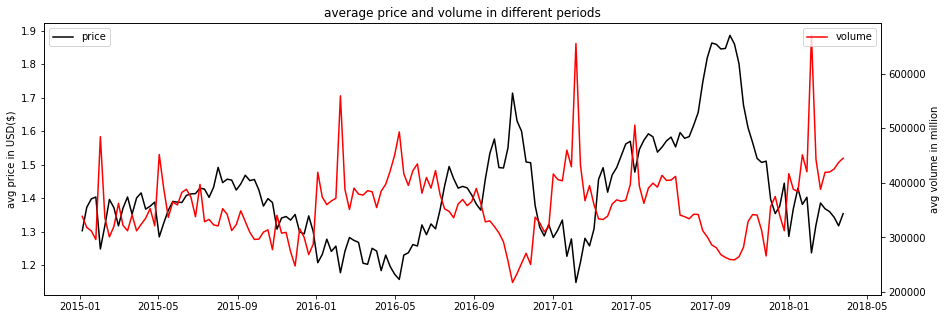

In [167]:
g1=df.groupby("date")["averageprice"].mean().reset_index().sort_values("date")
g2=df.groupby("date")["totalvolume"].mean().reset_index().sort_values("date")

fig,ax1=plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
ax1.plot(g1.date,g1.averageprice,color="k",label="price")
ax2.plot(g2.date,g2.totalvolume,color="r",label="volume")
ax1.set_ylabel("avg price in USD($)")
ax2.set_ylabel("avg volume in million")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("average price and volume in different periods")
plt.show()

# is there correlation between average pirce and volume?

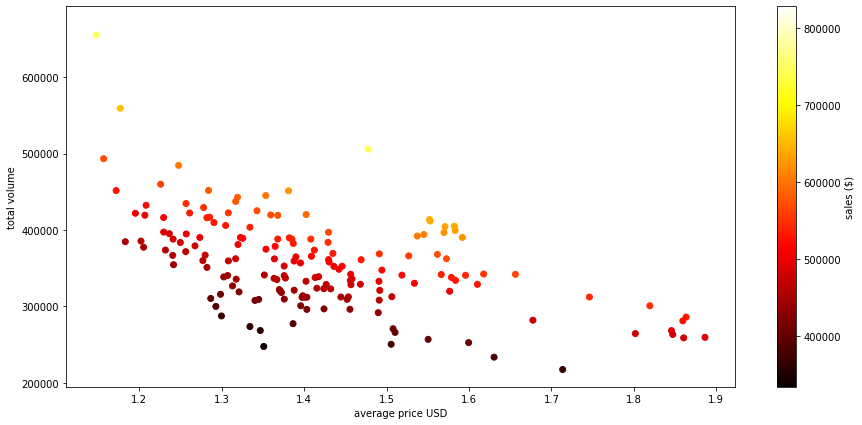

-0.5328284424020031

In [196]:
plt.figure(figsize=(15,7))
plt.scatter(g1.averageprice,g2.totalvolume,c=g1.averageprice*g2.totalvolume,cmap="hot")
plt.colorbar().set_label("sales ($)")
plt.xlabel('average price USD')
plt.ylabel("total volume")
plt.show()
g1.averageprice.corr(g2.totalvolume)

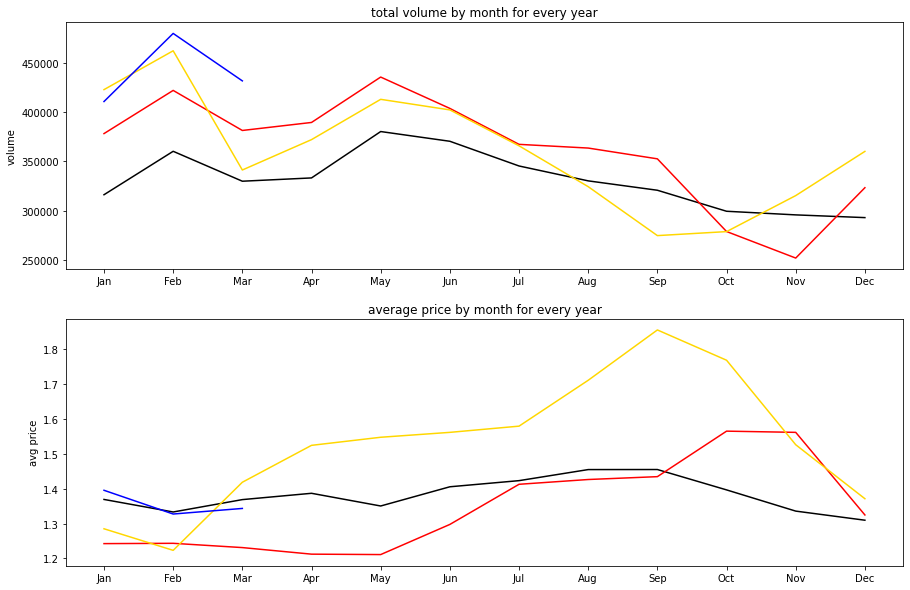

In [193]:
grouped=df.groupby(["year","month","monthnum"]).agg({"averageprice":"mean","totalvolume":"mean"}).reset_index()
grouped["year"]=grouped["year"].astype(str)

pivot=grouped.pivot(["month","monthnum"],"year",["totalvolume","averageprice"]).reset_index().sort_values("monthnum")

fig,axes=plt.subplots(2,1,figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(pivot.month,pivot["totalvolume"]["2015"],color="k")
plt.plot(pivot.month,pivot["totalvolume"]["2016"],color="r")
plt.plot(pivot.month,pivot["totalvolume"]["2017"],color="gold")
plt.plot(pivot.month,pivot["totalvolume"]["2018"],color="b")
plt.title("total volume by month for every year")
plt.ylabel("volume")

plt.subplot(2,1,2)
plt.plot(pivot.month,pivot["averageprice"]["2015"],color="k")
plt.plot(pivot.month,pivot["averageprice"]["2016"],color="r")
plt.plot(pivot.month,pivot["averageprice"]["2017"],color="gold")
plt.plot(pivot.month,pivot["averageprice"]["2018"],color="b")
plt.title("average price by month for every year")
plt.ylabel("avg price")
plt.show()


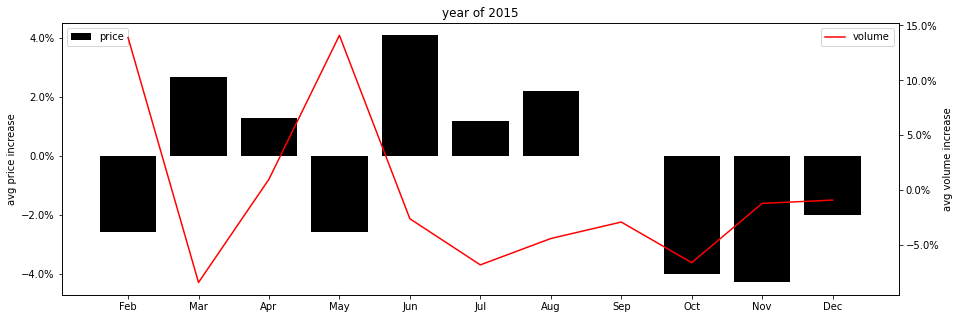

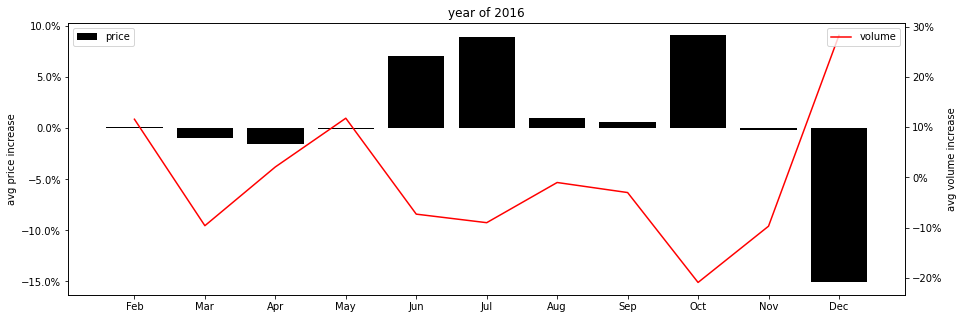

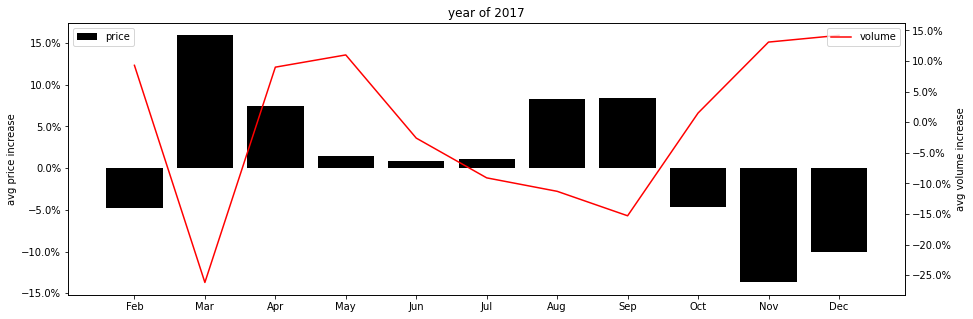

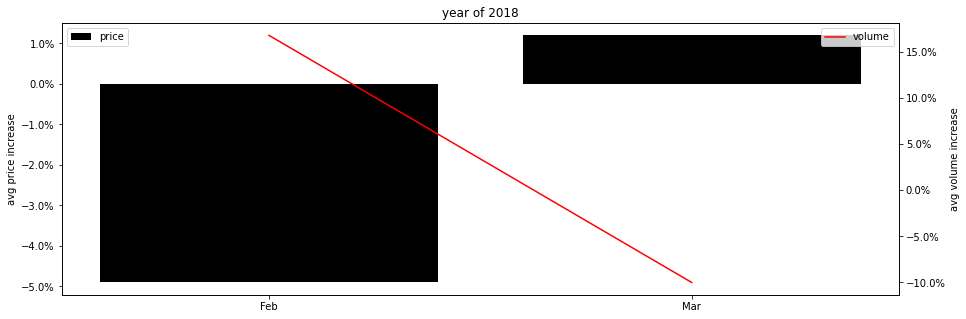

In [199]:
for y in sorted(df.year.unique()):
    g=df[df.year==y].groupby(["month","monthnum"]).agg({"averageprice":"mean","totalvolume":"mean"}).reset_index().sort_values("monthnum")
    g[["prev_price","prev_volum"]]=g[["averageprice","totalvolume"]].shift(1)
    g["price_increase"]=((g["averageprice"]-g.prev_price)/g.prev_price*100).round(1)
    g["volume_increase"]=((g["totalvolume"]-g.prev_volum)/g.prev_volum*100).round(1)

    fig,ax1=plt.subplots(figsize=(15,5))
    ax1.bar(g.month,g.price_increase,color="k",label="price")
    ax1.legend(loc="upper left")
    plt.ylabel("avg price increase")
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
    plt.title("year of "+str(y))
    ax2=ax1.twinx()
    ax2.plot(g.month,g.volume_increase,color="r",label="volume")
    ax2.legend(loc="upper right")
    plt.ylabel("avg volume increase")
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))

    plt.show()

# compare total volume of conventional and organic avocados

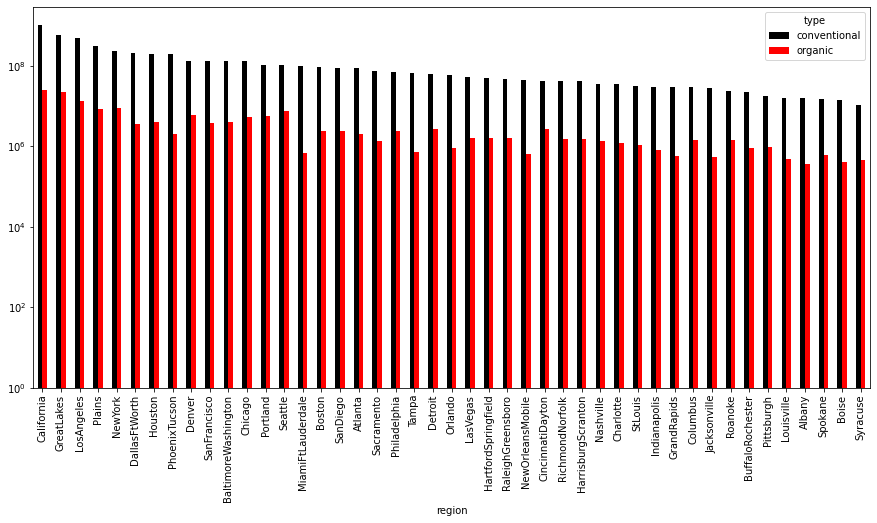

In [171]:
g=df.groupby(["type","region"])["totalvolume"].sum().reset_index()
g=g[g.region.str.contains("total|west|east|south|north",regex=True,case=False)==False]
p=g.pivot("region","type","totalvolume").reset_index()
p["total"]=p.organic+p.conventional
p=p.sort_values("total",ascending=False)
p["organic_percent"]=(p.organic/(p.conventional+p.organic)*100).round(1)
p.plot(kind="bar",x="region",y=["conventional","organic"],figsize=(15,7),log=True,color=["k","r"])
plt.show()

# plot the comparision between sold avocado sizes(4046,4225,4770)

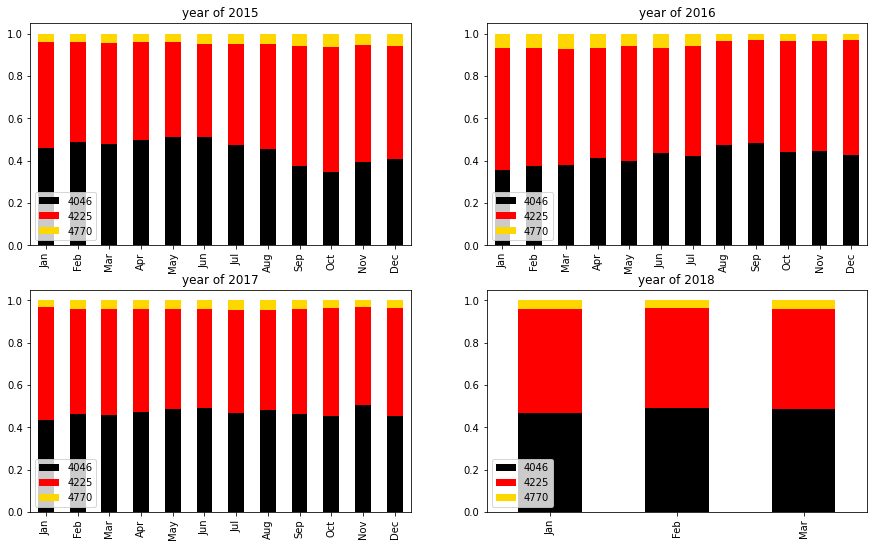

In [172]:
fig,axes=plt.subplots(2,2,figsize=(15,9))
for ax,y in zip(axes.ravel(),sorted(df.year.unique())):
    grouped=df[df.year==y].groupby(["month","monthnum"]).agg({"4046":"sum","4225":"sum","4770":"sum"}).reset_index().sort_values("monthnum")
    grouped.iloc[:,2:]=grouped.iloc[:,2:].div(grouped.iloc[:,2:].sum(axis=1), axis=0) #normalize rows
    grouped.plot(kind="bar",stacked=True,ax=ax,x="month",y=grouped.columns[2:],title=("year of "+str(y)),xlabel="",color=["k","r","gold"])
plt.show()